El objetivo de este Análisis Exploratorio de Datos (EDA) es entender el comportamiento de los taxis verdes y amarillos en Nueva York, específicamente en términos de ingresos generados en diferentes zonas. Utilizamos un conjunto de datos que contiene información detallada sobre cada viaje, incluyendo la ubicación y el monto total gastado.

En mi análisis, me enfoco en las zonas de Nueva York y calculo los ingresos totales generados en cada una de ellas tanto para los taxis verdes como para los amarillos. Visualizo estos datos utilizando gráficos de barras, lo que nos permite comparar fácilmente los ingresos entre las diferentes zonas y entre los dos tipos de taxis.

Además, propongo un Indicador Clave de Rendimiento (KPI) para ayudar a medir y entender mejor el rendimiento de los taxis. Este KPI incluye los ingresos totales por zona, la cantidad de viajes por zona, los ingresos promedio por viaje, y una comparación de los ingresos entre los taxis verdes y amarillos.

Esperamos que este análisis nos ayude a identificar patrones y tendencias que podrían informar decisiones estratégicas para mejorar la eficiencia y rentabilidad de los servicios de taxi en Nueva York.

In [76]:
# importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leo el csv
df= pd.read_csv('../csv/Taxis_Amarillos_CO2_NY.csv',low_memory=False)
df.head()

,trip_distance,Duracion,Distancia_por_Minuto,passenger_count,total_amount,parte_del_dia,CO2 Emissions,CO2,Smog
0,0.80,0 days 00:04:44,0.169014,1.0,11.50,Noche,(g/km),Rating,Rating
1,2.34,0 days 00:11:48,0.198305,2.0,21.20,Noche,167,6,7
2,1.62,0 days 00:04:03,0.400000,1.0,15.60,Noche,172,6,7
3,0.74,0 days 00:01:52,0.396429,1.0,11.10,Noche,181,6,6
4,9.85,0 days 00:36:42,0.268392,1.0,73.77,Noche,263,4,5


Esta función primero usa el método `dropna` para eliminar las filas que contienen al menos un valor NaN. Luego, imprime la forma del DataFrame resultante, que es una tupla que contiene el número de filas y el número de columnas. Finalmente, devuelve el DataFrame sin las filas que contienen NaN.

In [3]:
def eliminar_nan_y_mostrar_forma(df):
    # Eliminar filas con valores NaN
    df = df.dropna()

    # Imprimir la forma del DataFrame
    print(df.shape)

    return df

df = eliminar_nan_y_mostrar_forma(df)

(834, 9)


In [4]:
print(df.isnull().sum()) # no hay valores nulos

trip_distance           0
Duracion                0
Distancia_por_Minuto    0
passenger_count         0
total_amount            0
parte_del_dia           0
CO2 Emissions           0
CO2                     0
Smog                    0
dtype: int64


In [5]:
print(df.duplicated().sum()) # no hay valores duplicados

0


In [6]:
print(df.describe()) # describo el dataframe

       trip_distance  Distancia_por_Minuto  passenger_count  total_amount
count     834.000000            834.000000       834.000000    834.000000
mean        3.596954              0.238628         1.412470     27.566475
std         4.410845              0.120148         0.882068     22.556010
min         0.000000              0.000000         0.000000    -22.700000
25%         1.100000              0.163787         1.000000     15.480000
50%         1.980000              0.211174         1.000000     20.520000
75%         3.900000              0.285069         2.000000     29.757500
max        36.260000              0.755417         6.000000    206.520000


### Visualizacion de los viajes Taxis Amarillos y Taxis Verdes.

Este gráfico es un histograma que muestra la distribución de la cantidad total gastada en taxis amarillos. El eje `x` representa la cantidad total gastada y el eje `y` representa el número de viajes.

El propósito de este gráfico es visualizar cuánto gasta la gente en promedio en los taxis amarillos y cuál es la gama de cantidades gastadas.

El análisis de este gráfico sugiere que la mayoría de los viajes cuestan entre 0 y 50, ya que es donde se ve la mayor aglomeración de barras. Esto indica que la mayoría de los viajes en taxi son relativamente cortos o baratos.

Las barras antes del 0 indican que hubo algunos viajes donde los pasajeros recibieron un reembolso o no tuvieron que pagar nada. Esto podría deberse a errores en los datos, viajes cancelados o promociones especiales.

Las barras pequeñas entre 150 y 200 indican que hay muy pocos viajes que cuestan tanto. Estos podrían ser viajes muy largos o viajes donde se aplicaron tarifas adicionales.

En resumen, este gráfico proporciona una visión general de cuánto gasta la gente en los taxis amarillos y cómo se distribuyen estos gastos.

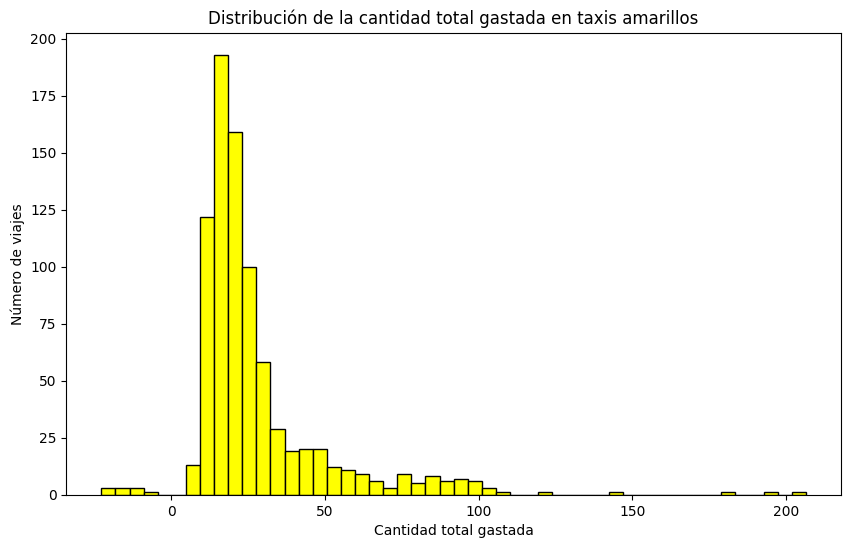

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount'], bins=50, color='yellow', edgecolor='black')
plt.title('Distribución de la cantidad total gastada en taxis amarillos')
plt.xlabel('Cantidad total gastada')
plt.ylabel('Número de viajes')
plt.show()

Voy hacer lectura el archivo de Taxis Verdes, para hacer correlacion y comparar con los Taxis Amarillos

In [15]:
df2=pd.read_csv('../csv/Taxis_Verdes_CO2_NY.csv',low_memory=False)
df2.head()

,trip_distance,CO2 Emissions,CO2,Smog,passenger_count,total_amount,parte_del_dia,dia,mes,viajes_todo_mes,Mes,Duracion,CO2_emissions_por_viaje
0,1.10,NaN,Rating,Rating,1.0,10.4,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:05:35,NaN
1,1.80,167.0,6,7,1.0,19.1,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:08:46,0.30060
2,10.52,172.0,6,7,2.0,61.0,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:23:51,1.80944
3,4.72,181.0,6,6,1.0,35.8,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:21:00,0.85432
4,5.95,263.0,4,5,1.0,26.5,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:11:08,1.56485


In [16]:
def eliminar_nan_y_mostrar_forma(df2):
    # Eliminar filas con valores NaN
    df2 = df2.dropna()

    # Imprimir la forma del DataFrame
    print(df2.shape)

    return df2

df2 = eliminar_nan_y_mostrar_forma(df2)

(833, 13)


In [17]:
print(df2.isnull().sum()) # no hay valores nulos

trip_distance              0
CO2 Emissions              0
CO2                        0
Smog                       0
passenger_count            0
total_amount               0
parte_del_dia              0
dia                        0
mes                        0
viajes_todo_mes            0
Mes                        0
Duracion                   0
CO2_emissions_por_viaje    0
dtype: int64


In [18]:
print(df2.duplicated().sum())# no hay valores duplicados

0


In [19]:
print(df2.describe()) # describo el dataframe

       trip_distance  CO2 Emissions  passenger_count  total_amount  \
count     833.000000     833.000000       833.000000    833.000000   
mean        3.111717     257.471789         1.225690     24.786411   
std         3.598040      64.262847         0.771775     25.228818   
min         0.000000     104.000000         0.000000    -11.100000   
25%         1.040000     211.000000         1.000000     12.200000   
50%         1.890000     254.000000         1.000000     18.000000   
75%         3.830000     299.000000         1.000000     29.040000   
max        26.370000     608.000000         6.000000    407.940000   

       CO2_emissions_por_viaje  
count               833.000000  
mean                  0.798395  
std                   0.972218  
min                   0.000000  
25%                   0.247680  
50%                   0.457710  
75%                   0.948750  
max                   9.109760  


En este histograma que muestra la distribución de la cantidad total gastada en taxis verdes. El eje `x` representa la cantidad total gastada y el eje `y` representa el número de viajes.

Este gráfico es visualizar cuánto gasta la gente en promedio en los `taxis verdes` y comparar las tarifas con los `taxis amarillos`.

El análisis de este gráfico sugiere que la mayoría de los viajes cuestan entre 0 y 100, ya que es donde se ve la mayor aglomeración de barras. Esto indica que la mayoría de los viajes en taxi verde son relativamente cortos o baratos.

Las barras pequeñas y dispersas hasta el 400 indican que hay muy pocos viajes que cuestan tanto. Estos podrían ser viajes muy largos o viajes donde se aplicaron tarifas adicionales.

Las barras que sobrepasan los 250 y 200 en el eje y indican que hay un número significativo de viajes que cuestan una cantidad específica. Esto podría deberse a una tarifa plana común o a una distancia de viaje común.

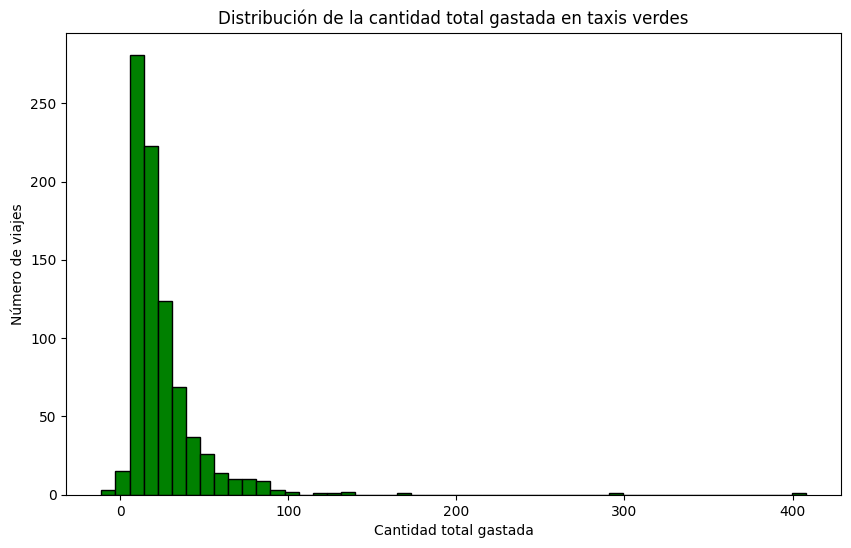

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df2['total_amount'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de la cantidad total gastada en taxis verdes')
plt.xlabel('Cantidad total gastada')
plt.ylabel('Número de viajes')
plt.show()

_____________________________________________________________________________________________________

In [31]:
df3=pd.read_csv('../csv/sources.csv',low_memory=False) # leo el csv
df3.head()

,mdb_source_id,data_type,entity_type,location.country_code,location.subdivision_name,location.municipality,provider,name,note,static_reference,...,urls.license,location.bounding_box.minimum_latitude,location.bounding_box.maximum_latitude,location.bounding_box.minimum_longitude,location.bounding_box.maximum_longitude,location.bounding_box.extracted_on,status,features,redirect.id,redirect.comment
0,1,gtfs,NaN,US,Maine,Casco Bay,Casco Bay Lines,NaN,NaN,NaN,...,NaN,43.655373,43.716190,-70.248666,-70.110180,2022-02-22T19:51:22+00:00,NaN,NaN,NaN,NaN
1,2,gtfs,NaN,CA,Ontario,London,London Transit Commission,NaN,NaN,NaN,...,https://www.londontransit.ca/open-data/ltcs-op...,42.905244,43.051188,-81.363110,-81.137591,2022-02-22T19:51:34+00:00,NaN,NaN,NaN,NaN
2,3,gtfs,NaN,CA,Ontario,Barrie,Barrie Transit,NaN,NaN,NaN,...,NaN,44.321804,44.420207,-79.740632,-79.610896,2022-03-01T22:43:25+00:00,NaN,NaN,NaN,NaN
3,4,gtfs,NaN,US,Ohio,Athens,Athens Public Transit,NaN,NaN,NaN,...,NaN,39.295665,39.399200,-82.141964,-82.027972,2022-03-23T14:43:11+00:00,inactive,NaN,NaN,NaN
4,5,gtfs,NaN,US,New York,Canton,St Lawrence County Public Transit,NaN,NaN,NaN,...,https://data.ny.gov/download/77gx-ii52/applica...,44.148476,44.979369,-75.756950,-74.611761,2022-03-14T20:02:31+00:00,NaN,NaN,NaN,NaN


Este código crea un nuevo DataFrame llamado df_taxisamarillos_co2 a partir de la combinación de columnas de dos DataFrames diferentes, df y df3. El objetivo aparente es seleccionar ciertas columnas específicas relacionadas con los viajes de taxis amarillos y la información geográfica asociada. <br>

El propósito de este código es para organizar y estructurar la información relevante de los viajes de taxis amarillos, incluyendo datos relacionados con las ganancias que se generan por ubicación geográfica.

In [59]:
df_taxisamarillos_co2 = pd.DataFrame({
    'trip_distance': df['trip_distance'],
    'passenger_count': df['passenger_count'],
    'total_amount': df['total_amount'],
    'parte_del_dia': df['parte_del_dia'],
    'location.subdivision_name': df3['location.subdivision_name'],
    'location.municipality': df3['location.municipality'],
    'location.bounding_box.minimum_latitude': df3['location.bounding_box.minimum_latitude'],
    'location.bounding_box.maximum_latitude': df3['location.bounding_box.maximum_latitude'],
    'location.bounding_box.minimum_longitude': df3['location.bounding_box.minimum_longitude'],
    'location.bounding_box.maximum_longitude': df3['location.bounding_box.maximum_longitude'],
        
}) # Creo un nuevo dataframe con las columnas que necesito.

In [60]:
df_taxisamarillos_co2[df_taxisamarillos_co2['location.subdivision_name'].str.contains('New York', na=False)]


,trip_distance,passenger_count,total_amount,parte_del_dia,location.subdivision_name,location.municipality,location.bounding_box.minimum_latitude,location.bounding_box.maximum_latitude,location.bounding_box.minimum_longitude,location.bounding_box.maximum_longitude
4,9.85,1.0,73.77,Noche,New York,Canton,44.148476,44.979369,-75.756950,-74.611761
208,5.49,2.0,38.16,Noche,New York,New York City,39.951653,40.764429,-74.891731,-73.971167
232,1.91,1.0,22.66,Noche,New York,Utica,42.307476,44.163689,-77.884659,-74.752197
238,0.67,1.0,14.64,Noche,New York,Binghamton,42.035993,42.168976,-76.091274,-75.806340
301,2.30,1.0,20.50,Noche,New York,Elmira,42.115440,42.182297,-77.141640,-76.970590
...,...,...,...,...,...,...,...,...,...,...
1638,NaN,NaN,NaN,NaN,New York,New York City,40.566157,40.805455,-74.074171,-73.769134
1646,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907
1647,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907
1648,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907


In [61]:
df_taxisamarillos_co2.dropna(inplace=True) # Elimino los valores nulos

In [62]:
df_taxisamarillos_co2.isnull().any() # Compruebo que no haya valores nulos

trip_distance                              False
passenger_count                            False
total_amount                               False
parte_del_dia                              False
location.subdivision_name                  False
location.municipality                      False
location.bounding_box.minimum_latitude     False
location.bounding_box.maximum_latitude     False
location.bounding_box.minimum_longitude    False
location.bounding_box.maximum_longitude    False
dtype: bool

_____________________________________________________________________________________________________

El código crea un nuevo DataFrame llamado df_taxisverdes_co2 a partir de la combinación de columnas de dos DataFrames diferentes, df2 y df3. El objetivo es seleccionar ciertas columnas específicas relacionadas con los viajes de taxis verdes y la información geográfica asociada.

In [64]:
df_taxisverdes_co2 = pd.DataFrame({
    'trip_distance': df2['trip_distance'],
    'passenger_count': df2['passenger_count'],
    'total_amount': df2['total_amount'],
    'parte_del_dia': df2['parte_del_dia'],
    'viajes_todo_mes': df2['viajes_todo_mes'],
    'location.subdivision_name': df3['location.subdivision_name'],
    'location.municipality': df3['location.municipality'],
    'location.bounding_box.minimum_latitude': df3['location.bounding_box.minimum_latitude'],
    'location.bounding_box.maximum_latitude': df3['location.bounding_box.maximum_latitude'],
    'location.bounding_box.minimum_longitude': df3['location.bounding_box.minimum_longitude'],
    'location.bounding_box.maximum_longitude': df3['location.bounding_box.maximum_longitude'],
        
}) # Creo un nuevo dataframe con las columnas que necesito.

In [65]:
# Compruebo que solo haya viajes en New York
df_taxisverdes_co2[df_taxisverdes_co2['location.subdivision_name'].str.contains('New York', na=False)] 

,trip_distance,passenger_count,total_amount,parte_del_dia,viajes_todo_mes,location.subdivision_name,location.municipality,location.bounding_box.minimum_latitude,location.bounding_box.maximum_latitude,location.bounding_box.minimum_longitude,location.bounding_box.maximum_longitude
4,5.95,1.0,26.50,Noche,Noche,New York,Canton,44.148476,44.979369,-75.756950,-74.611761
208,0.50,1.0,6.60,Mañana,Mañana,New York,New York City,39.951653,40.764429,-74.891731,-73.971167
232,0.50,1.0,8.76,Mañana,Mañana,New York,Utica,42.307476,44.163689,-77.884659,-74.752197
238,4.79,1.0,27.50,Mañana,Mañana,New York,Binghamton,42.035993,42.168976,-76.091274,-75.806340
301,1.37,1.0,13.80,Tarde,Tarde,New York,Elmira,42.115440,42.182297,-77.141640,-76.970590
...,...,...,...,...,...,...,...,...,...,...,...
1638,NaN,NaN,NaN,NaN,NaN,New York,New York City,40.566157,40.805455,-74.074171,-73.769134
1646,NaN,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907
1647,NaN,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907
1648,NaN,NaN,NaN,NaN,NaN,New York,Ithaca,42.327900,42.590714,-76.678131,-76.280907


In [66]:
df_taxisverdes_co2.dropna(inplace=True) # Elimino los valores nulos

In [67]:
df_taxisverdes_co2.isnull().any() # Compruebo que no haya valores nulos

trip_distance                              False
passenger_count                            False
total_amount                               False
parte_del_dia                              False
viajes_todo_mes                            False
location.subdivision_name                  False
location.municipality                      False
location.bounding_box.minimum_latitude     False
location.bounding_box.maximum_latitude     False
location.bounding_box.minimum_longitude    False
location.bounding_box.maximum_longitude    False
dtype: bool

Este gráfico muestra los ingresos de los `Taxis Verdes` por zona en la ciudad de Nueva York.

El código primero filtra las filas del DataFrame df_taxisverdes_co2 para incluir solo aquellas donde la columna 'location.municipality' contiene 'New York'. Luego, agrupa los datos por zona utilizando la columna 'location.municipality' y calcula la suma de la cantidad total gastada en cada zona.

Después de ordenar los resultados, se crea un gráfico de barras utilizando la función plot() de matplotlib. El eje x representa las zonas y el eje y representa la cantidad total gastada. Cada barra en el gráfico representa los ingresos de los Taxis Verdes en una zona específica.

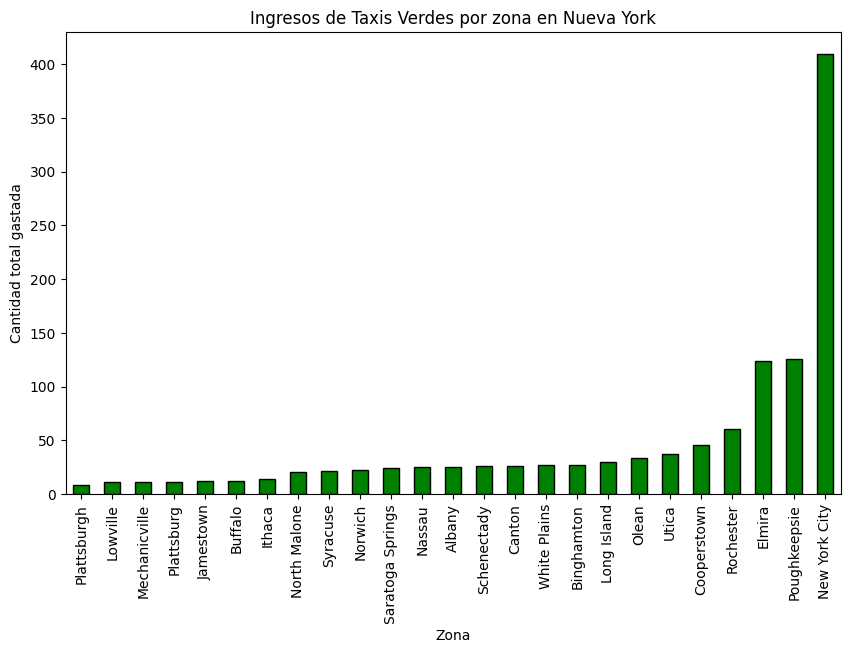

In [68]:
# Filtrar para incluir solo las filas donde 'location.municipality' contiene 'New York'
df_ny = df_taxisverdes_co2[df_taxisverdes_co2['location.subdivision_name'].str.contains('New York', na=False)]

# Agrupar por zona y sumar la cantidad total gastada
zonas_comunes = df_ny.groupby('location.municipality')['total_amount'].sum()

# Ordenar los resultados
zone_totals = zonas_comunes.sort_values()

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
zone_totals.plot(kind='bar', color='green', edgecolor='black')
plt.title('Ingresos de Taxis Verdes por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Cantidad total gastada')
plt.show()

______________________________________________________________________________________________________
 Este otro gráfico de barras representa los ingresos totales de `Taxis Amarillos` en diferentes zonas de la ciudad de Nueva York. Cada barra en el gráfico corresponde a una zona, y la altura de la barra indica la cantidad total gastada en esa zona. 

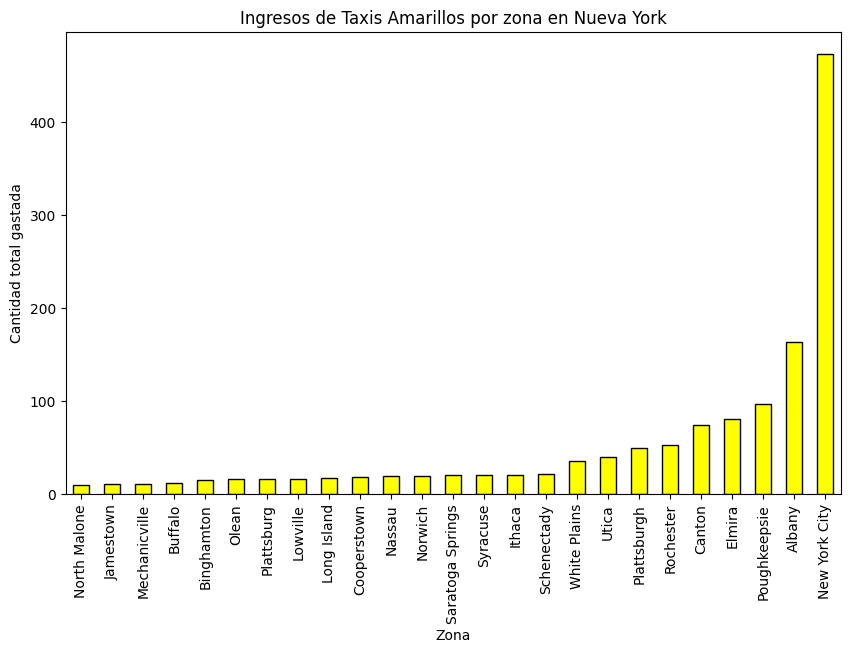

In [69]:
# Filtrar para incluir solo las filas donde 'location.municipality' contiene 'New York'
df_ny = df_taxisamarillos_co2[df_taxisamarillos_co2['location.subdivision_name'].str.contains('New York', na=False)]

# Agrupar por zona y sumar la cantidad total gastada
zonas_comunes = df_ny.groupby('location.municipality')['total_amount'].sum()

# Ordenar los resultados
zone_totals = zonas_comunes.sort_values()

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
zone_totals.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Ingresos de Taxis Amarillos por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Cantidad total gastada')
plt.show()

### KPI Comparación de Ingresos entre Taxis Verdes y Amarillos:
__________________________________________________________________________________________________
El propósito de este Indicador Clave de Rendimiento (KPI) es comparar los ingresos totales generados por taxis verdes y taxis amarillos. El KPI calcula los ingresos totales para cada tipo de taxi sumando la columna 'total_amount' en los respectivos dataframes (df_taxisverdes_co2 y df_taxisamarillos_co2).

La conclusión obtenida de este KPI se visualiza a través de un gráfico de barras que compara los ingresos totales de taxis verdes y taxis amarillos.El propósito de esta visualización es proporcionar una comparación clara de los ingresos generados por cada tipo de taxi.

Al analizar el gráfico de barras, podemos determinar qué tipo de taxi genera más ingresos. La diferencia de ingresos entre taxis verdes y taxis amarillos también se calcula y se muestra.

Este KPI puede proporcionar información sobre la cuota de mercado y la rentabilidad de cada tipo de taxi, lo que puede informar estrategias comerciales y procesos de toma de decisiones.

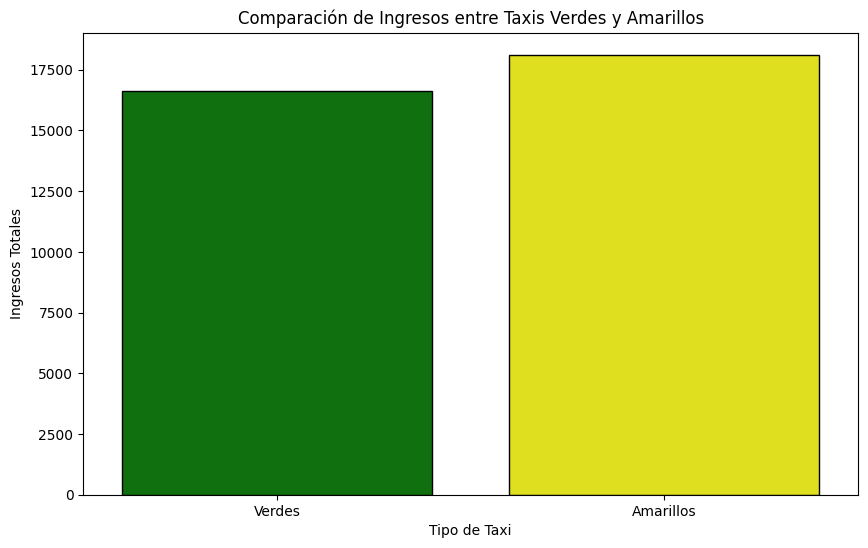

In [75]:
# Calcular el total de ingresos para cada tipo de taxi
total_ingresos_verdes = df_taxisverdes_co2['total_amount'].sum()
total_ingresos_amarillos = df_taxisamarillos_co2['total_amount'].sum()

# Calcular la diferencia en ingresos
comparacion_ingresos = total_ingresos_verdes - total_ingresos_amarillos

# Crear un DataFrame con los resultados
df_comparacion = pd.DataFrame({'Tipo de Taxi': ['Verdes', 'Amarillos'],
                               'Ingresos Totales': [total_ingresos_verdes, total_ingresos_amarillos]})

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Tipo de Taxi', y='Ingresos Totales', hue='Tipo de Taxi', data=df_comparacion, palette=['green', 'yellow'], edgecolor='black', legend=False)

# Añadir las etiquetas
for i, bar in enumerate(barplot.patches):
    bar.set_edgecolor('black')

plt.title('Comparación de Ingresos entre Taxis Verdes y Amarillos')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Ingresos Totales')
plt.show()

